#### 

#### microsoft stock analysis
Through this notebook, I delve into the intricacies of Microsoft's financial performance and market behavior. By leveraging advanced analytics techniques and visualizations, I aim to provide meaningful insights and predictions for investors and enthusiasts alike. I meticulously examine key financial indicators, historical price patterns, and market trends to uncover valuable trading signals and investment opportunities. Whether you're a seasoned investor or simply curious about Microsoft's stock.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
df=pd.read_csv("Microsoft_Stock.csv")
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


#### lets know some informations about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


#### convert Date column data type to Date daata

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1511 entries, 0 to 1510
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1511 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.9 KB


In [5]:
# columns names in the dataframe
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


#### After we knew some important information about the dataframe 
#### let answer some questions about it

1- What is the overall trend of Microsoft stock prices over the given time period?

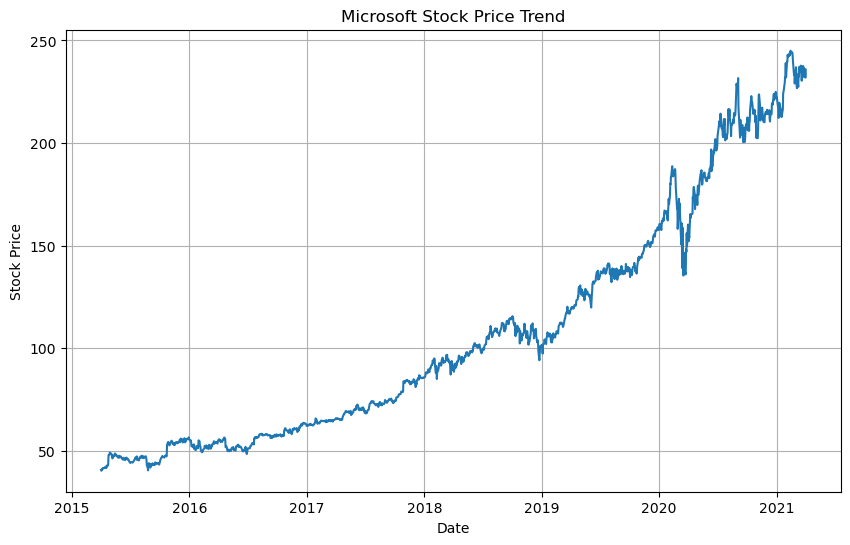

In [8]:
# Plotting the stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price Trend')
plt.grid(True)
plt.show()

**** we see that the overall trend of Microsoft stock prices is up trend 

2 - How does the stock price of Microsoft vary on a daily/weekly/monthly basis?

In [9]:
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace = True)

# Resample the data on a daily, weekly, and monthly basis and calculate the mean stock price
daily_prices = df['Close'].resample('D').mean()
weekly_prices = df['Close'].resample('W').mean()
monthly_prices = df['Close'].resample('M').mean()

# Print the variation in stock prices on a daily, weekly, and monthly basis
print("Daily variation in stock prices:")
print(daily_prices.head(10))
print()

print("Weekly variation in stock prices:")
print(weekly_prices.head(10))
print()

print("Monthly variation in stock prices:")
print(monthly_prices.head(10))

Daily variation in stock prices:
Date
2015-04-01    40.72
2015-04-02    40.29
2015-04-03      NaN
2015-04-04      NaN
2015-04-05      NaN
2015-04-06    41.55
2015-04-07    41.53
2015-04-08    41.42
2015-04-09    41.48
2015-04-10    41.72
Freq: D, Name: Close, dtype: float64

Weekly variation in stock prices:
Date
2015-04-05    40.5050
2015-04-12    41.5400
2015-04-19    41.8900
2015-04-26    43.9500
2015-05-03    48.7100
2015-05-10    47.3140
2015-05-17    47.8740
2015-05-24    47.4980
2015-05-31    47.1275
2015-06-07    46.7000
Freq: W-SUN, Name: Close, dtype: float64

Monthly variation in stock prices:
Date
2015-04-30    43.466667
2015-05-31    47.530000
2015-06-30    45.964091
2015-07-31    45.611818
2015-08-31    45.506667
2015-09-30    43.561429
2015-10-31    48.700909
2015-11-30    53.885000
2015-12-31    55.395909
2016-01-31    52.403684
Freq: M, Name: Close, dtype: float64


What is the average daily return and volatility (standard deviation) of Microsoft's stock from(4-2015) to (4-2021)?

In [10]:
# Calculate the daily returns
df['Return'] = df['Close'].pct_change()

# Calculate the average daily return
average_daily_return = df['Return'].mean()

# Calculate the volatility (standard deviation) of daily returns
volatility = df['Return'].std()

# Print the results
print("Average Daily Return:", round(average_daily_return, 5))
print("Volatility:", round(volatility, 5))

Average Daily Return: 0.00132
Volatility: 0.01745


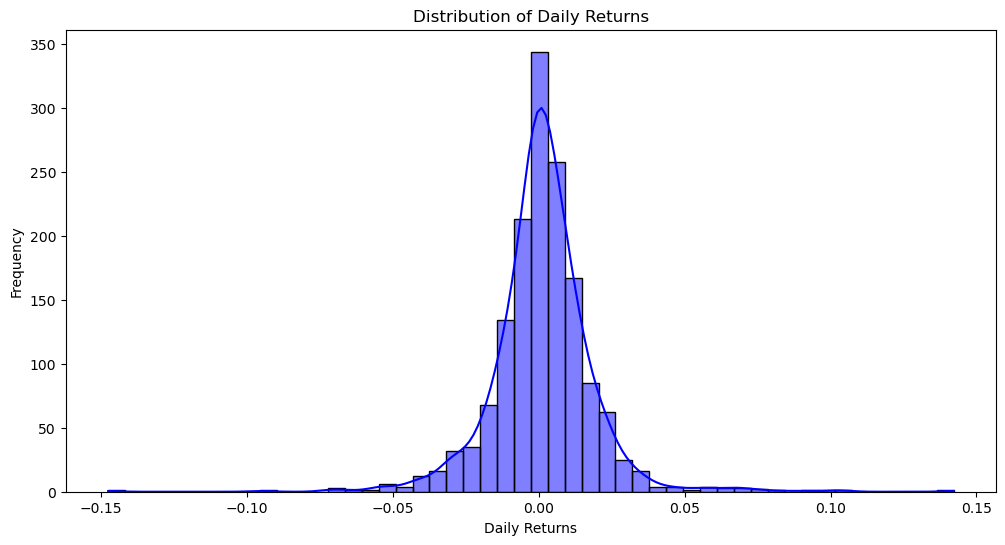

In [11]:
# Distribution plot of the daily returns
daily_returns = df['Close'].pct_change().dropna()


plt.figure(figsize=(12, 6))
sns.histplot(daily_returns, kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

Are there periods of high volatility that coincide with specific events or market conditions? 

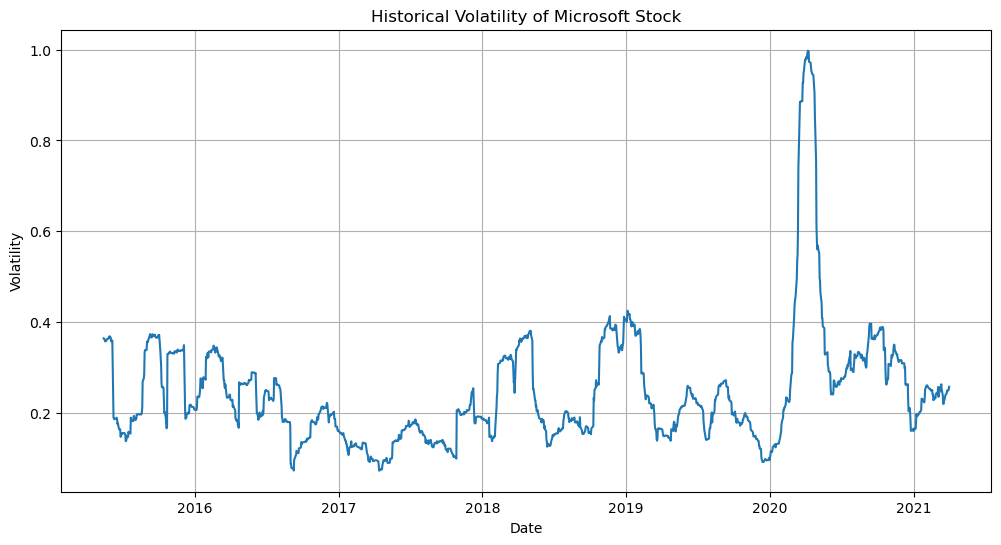

In [12]:
# Calculate the historical volatility using the daily returns
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=30).std() * (252 ** 0.5)  # Assuming 252 trading days in a year

# Plot the volatility
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Historical Volatility of Microsoft Stock')
plt.grid(True)
plt.show()

Is there a relationship between trading volume and stock price movements?

In [13]:
# Calculate the correlation between trading volume and stock price movements
correlation = df['Volume'].corr(df['Close'])

# Print the correlation value
print("Correlation between trading volume and stock price movements:", round(correlation, 5))

Correlation between trading volume and stock price movements: 0.05215


Calculate and plot various moving averages (e.g., 50-day, 200-day) for Microsoft's stock . 

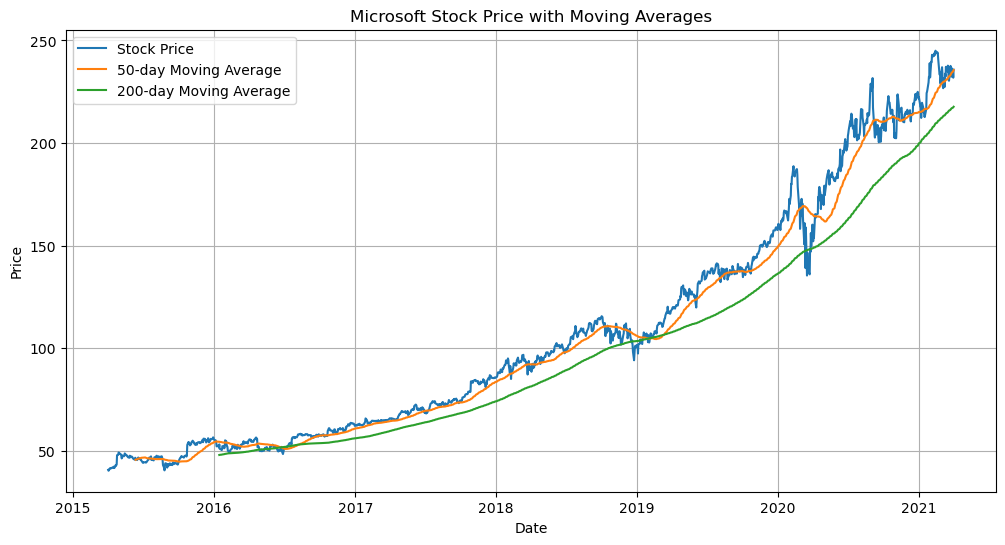

In [14]:
# Calculate the moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plot the stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.plot(df.index, df['MA_50'], label='50-day Moving Average')
plt.plot(df.index, df['MA_200'], label='200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Microsoft Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


Calculate and plot various moving averages (e.g., 50-day, 200-day) for Microsoft's stock. Are there any crossovers or patterns that indicate potential buy or sell signals?

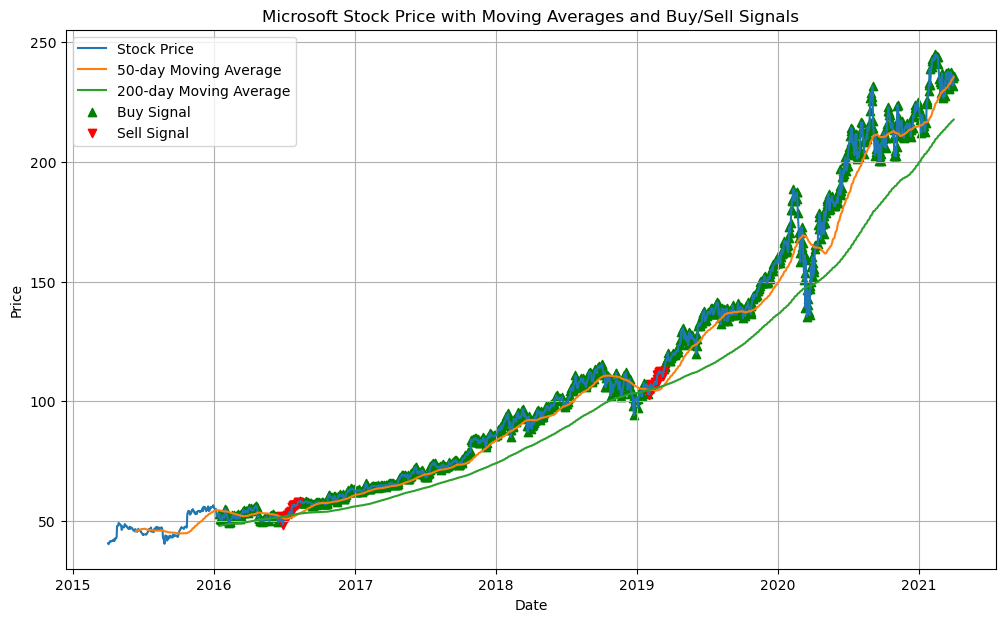

In [15]:
# Calculate the moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Identify potential buy or sell signals based on crossovers
df['Signal'] = 0  # Initialize the signal column

# Buy signal: 50-day moving average crosses above the 200-day moving average
df.loc[df['MA_50'] > df['MA_200'], 'Signal'] = 1

# Sell signal: 50-day moving average crosses below the 200-day moving average
df.loc[df['MA_50'] < df['MA_200'], 'Signal'] = -1

# Plot the stock price and moving averages
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.plot(df.index, df['MA_50'], label='50-day Moving Average')
plt.plot(df.index, df['MA_200'], label='200-day Moving Average')

# Plot the buy and sell signals
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Microsoft Stock Price with Moving Averages and Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.show()

What is the relationship between the stock price and its moving averages? Does the price tend to bounce off certain moving averages? 

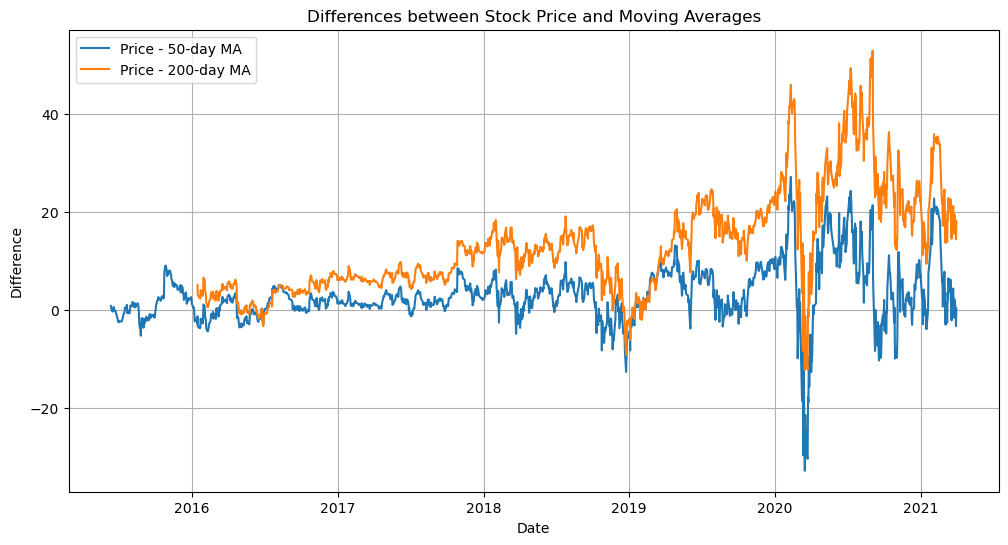

In [16]:
# Calculate the differences between the stock price and each moving average
df['Diff_MA_50'] = df['Close'] - df['MA_50']
df['Diff_MA_200'] = df['Close'] - df['MA_200']

# Plot the differences
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Diff_MA_50'], label='Price - 50-day MA')
plt.plot(df.index, df['Diff_MA_200'], label='Price - 200-day MA')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Differences between Stock Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

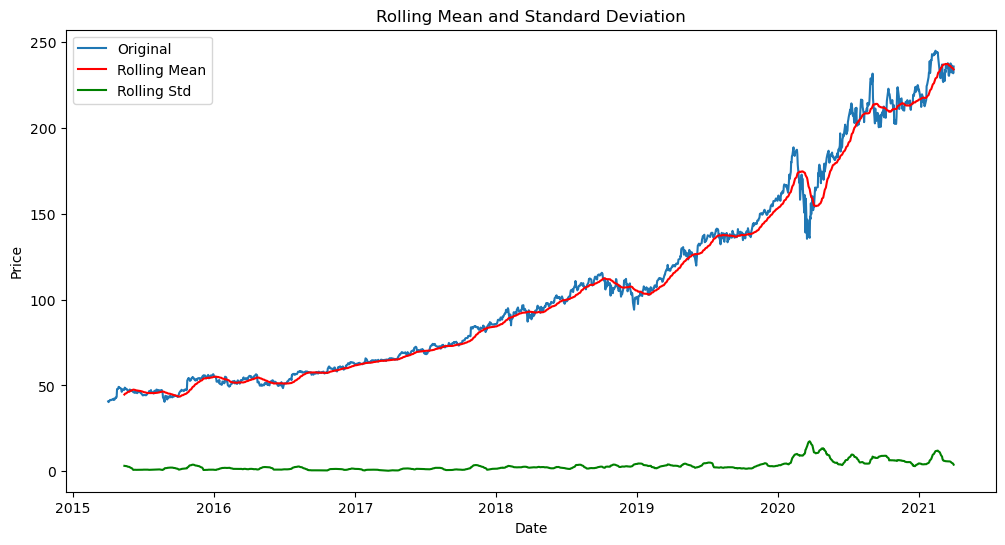

In [17]:
# Rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='r')
plt.plot(rolling_std, label='Rolling Std', color='g')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()